In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

(CVXPY) Oct 10 12:13:39 PM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Problem description
section 4.3 in https://web.stanford.edu/~boyd/papers/os_bundle_distr_opt.html 

# Create parameters

In [2]:
params = ob.mcf_params(num_vertices=100, num_edges=1000, M=10)

# Distributed solution

In [3]:
agents = ob.mcf_agents(params)
g = ob.mcf_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
x_agent, x_global = prob.solve(rel_gap = 10**(-5), abs_gap = 10**(-5), max_iter=30)

k=0, rel_gap=1950.6605104305659, L=-20000.0, U=-10.247683904608849
k=1, rel_gap=8.748678588567952, L=-99.90137666327271, U=-10.247683904608849
k=2, rel_gap=7.410295790198076, L=-99.88991297511532, U=-11.877098673691565
k=3, rel_gap=1.2356250445204475, L=-99.49865578979231, U=-44.50596759669744
k=4, rel_gap=0.7402745980918227, L=-99.49865578979737, U=-57.17411257906983
k=5, rel_gap=0.4833438702651469, L=-99.40515869878747, U=-67.01423769056251
k=6, rel_gap=0.33828382492064746, L=-99.40515869879036, U=-74.27808425068913
k=7, rel_gap=0.21909559063182507, L=-95.56213767999445, U=-78.38773137590229
k=8, rel_gap=0.16219057821466043, L=-95.3919982900525, U=-82.07947997357907
k=9, rel_gap=0.12823505903909713, L=-95.29170997608988, U=-84.46086585648966
k=10, rel_gap=0.10719162381785598, L=-95.2713952776914, U=-86.04779265686035
k=11, rel_gap=0.0739494258855948, L=-93.83418914582721, U=-87.37300554767756


/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:1358: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=12, rel_gap=0.06074511401964821, L=-93.18386681676532, U=-87.84755695329017
k=13, rel_gap=0.049235285043673485, L=-92.67147722900523, U=-88.32287528830854
k=14, rel_gap=0.04314998378459729, L=-92.5834392236906, U=-88.75371774228815
k=15, rel_gap=0.033233987087633206, L=-92.17635566052553, U=-89.21150176286994
k=16, rel_gap=0.02569380466129473, L=-92.11111981050072, U=-89.8037205566604
k=17, rel_gap=0.02264925957746739, L=-92.10378288524637, U=-90.06390218607434
k=18, rel_gap=0.01636199398005639, L=-91.94574620107142, U=-90.46554942596134
k=19, rel_gap=0.01583573025892359, L=-91.89813746439619, U=-90.46554942596134
k=20, rel_gap=0.014200173021996254, L=-91.88865985304628, U=-90.60209443590124
k=21, rel_gap=0.012696607355543408, L=-91.78117990381247, U=-90.63048028123728
k=22, rel_gap=0.011264049061262122, L=-91.72043879115492, U=-90.69880302409378
k=23, rel_gap=0.009871003327068915, L=-91.70043948156425, U=-90.80411179195433
k=24, rel_gap=0.009474902827837386, L=-91.68317115918336, U=

# Centralized solution

In [5]:
x_cvx, prob_cvx, h_cvx = ob.cvx_multi_commodity_flow(params=params)

In [6]:
h_cvx, prob.upper_bnd[-1]

(-91.06538427818603, -90.94463244352292)

# Plot

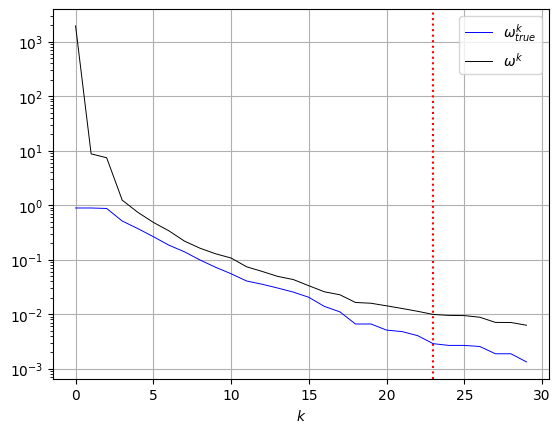

In [7]:
ob.plot_true_rel_gap_uk(lk = prob.lower_bnd, uk = prob.upper_bnd, h_true = h_cvx)